<a href="https://colab.research.google.com/github/adnan8914/Market_Analysis/blob/main/Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


 Load Data

In [ ]:
import pandas as pd

# Load transaction data
transaction_df = pd.read_csv('transaction_data.csv')

# Load purchase behavior data
behavior_df = pd.read_csv('purchase_behaviour.csv')

Top 5 Rows for dataset understanding



In [ ]:
transaction_df.head()


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2.0,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3.0,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2.0,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5.0,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3.0,13.8


Top 5 Rows for dataset understanding



In [ ]:
behavior_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


 Clean and Preprocess Data

In [ ]:
# Clean product names (remove extra spaces)
transaction_df['PROD_NAME'] = transaction_df['PROD_NAME'].str.strip()

# Ensure there are no missing values in key columns
transaction_df.dropna(subset=['LYLTY_CARD_NBR', 'PROD_NAME', 'TOT_SALES'], inplace=True)
behavior_df.dropna(subset=['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], inplace=True)

 Identify Top 3 Most Profitable Products

In [ ]:
# Calculate total sales per product
product_profit = transaction_df.groupby(['PROD_NBR', 'PROD_NAME'])['TOT_SALES'].sum().reset_index()
product_profit_sorted = product_profit.sort_values('TOT_SALES', ascending=False)

# Get top 3 products
top_3_products = product_profit_sorted.head(3)
print("Top 3 Most Profitable Products:")
print(top_3_products[['PROD_NAME', 'TOT_SALES']])

Top 3 Most Profitable Products:
                                   PROD_NAME  TOT_SALES
3           Dorito Corn Chp     Supreme 380g    33163.0
13    Smiths Crnkle Chip  Orgnl Big Bag 380g    29854.0
15  Smiths Crinkle Chips Salt & Vinegar 330g    28528.5


Analyze Customer Loyalty

In [ ]:
# Calculate total transactions and sales per customer
customer_activity = transaction_df.groupby('LYLTY_CARD_NBR').agg(
    total_transactions=('TXN_ID', 'count'),
    total_sales=('TOT_SALES', 'sum')
).reset_index()

# Merge with purchase behavior data
merged_data = pd.merge(customer_activity, behavior_df, on='LYLTY_CARD_NBR')

# Identify top 10% of customers by total transactions (most loyal)
top_customers = merged_data.nlargest(int(len(merged_data) * 0.1), 'total_transactions')

# Analyze characteristics of loyal customers
loyal_segments = top_customers.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).size().reset_index(name='count')
loyal_segments_sorted = loyal_segments.sort_values('count', ascending=False)

print("\nCharacteristics of Most Loyal Customers:")
print(loyal_segments_sorted)


Characteristics of Most Loyal Customers:
                 LIFESTAGE PREMIUM_CUSTOMER  count
4           OLDER FAMILIES           Budget   1162
13          YOUNG FAMILIES           Budget    900
5           OLDER FAMILIES       Mainstream    721
14          YOUNG FAMILIES       Mainstream    594
6           OLDER FAMILIES          Premium    535
7    OLDER SINGLES/COUPLES           Budget    278
8    OLDER SINGLES/COUPLES       Mainstream    271
9    OLDER SINGLES/COUPLES          Premium    266
1   MIDAGE SINGLES/COUPLES       Mainstream    216
11                RETIREES       Mainstream    174
2   MIDAGE SINGLES/COUPLES          Premium    147
10                RETIREES           Budget    139
12                RETIREES          Premium    112
0   MIDAGE SINGLES/COUPLES           Budget     80
15          YOUNG FAMILIES          Premium     38
3             NEW FAMILIES       Mainstream      1


In [ ]:
print("\nHypotheses on Why These Segments Are Loyal:")
print("""
1. **OLDER FAMILIES (Premium)**:
   - Likely prioritize convenience and quality over price.
   - May buy larger quantities for family needs, leading to repeat purchases.
   - Premium products might align with their preference for trusted brands.

2. **MIDAGE SINGLES/COUPLES (Mainstream)**:
   - Mainstream products are widely available and affordable.
   - Likely influenced by promotions or rewards programs.
   - Busy lifestyles may lead to routine purchases of familiar brands.

3. **YOUNG SINGLES/COUPLES (Budget)**:
   - Price-sensitive but loyal to budget-friendly options.
   - May respond to discounts or bulk deals.
   - Smaller households mean consistent, frequent purchases of smaller packs.
""")


Hypotheses on Why These Segments Are Loyal:

1. **OLDER FAMILIES (Premium)**:
   - Likely prioritize convenience and quality over price.
   - May buy larger quantities for family needs, leading to repeat purchases.
   - Premium products might align with their preference for trusted brands.

2. **MIDAGE SINGLES/COUPLES (Mainstream)**:
   - Mainstream products are widely available and affordable.
   - Likely influenced by promotions or rewards programs.
   - Busy lifestyles may lead to routine purchases of familiar brands.

3. **YOUNG SINGLES/COUPLES (Budget)**:
   - Price-sensitive but loyal to budget-friendly options.
   - May respond to discounts or bulk deals.
   - Smaller households mean consistent, frequent purchases of smaller packs.



In [ ]:
# Data Overview and Summary Statistics
print("Transaction Data Summary:")
print(transaction_df.describe())

print("\nPurchase Behavior Data Summary:")
print(behavior_df.describe())

Transaction Data Summary:
                DATE     STORE_NBR  LYLTY_CARD_NBR        TXN_ID  \
count  264836.000000  264836.00000    2.648360e+05  2.648360e+05   
mean    43464.036260     135.08011    1.355495e+05  1.351583e+05   
std       105.389282      76.78418    8.057998e+04  7.813303e+04   
min     43282.000000       1.00000    1.000000e+03  1.000000e+00   
25%     43373.000000      70.00000    7.002100e+04  6.760150e+04   
50%     43464.000000     130.00000    1.303575e+05  1.351375e+05   
75%     43555.000000     203.00000    2.030942e+05  2.027012e+05   
max     43646.000000     272.00000    2.373711e+06  2.415841e+06   

            PROD_NBR       PROD_QTY      TOT_SALES  
count  264836.000000  264836.000000  264836.000000  
mean       56.583157       1.907309       7.304200  
std        32.826638       0.643654       3.083226  
min         1.000000       1.000000       1.500000  
25%        28.000000       2.000000       5.400000  
50%        56.000000       2.000000       7

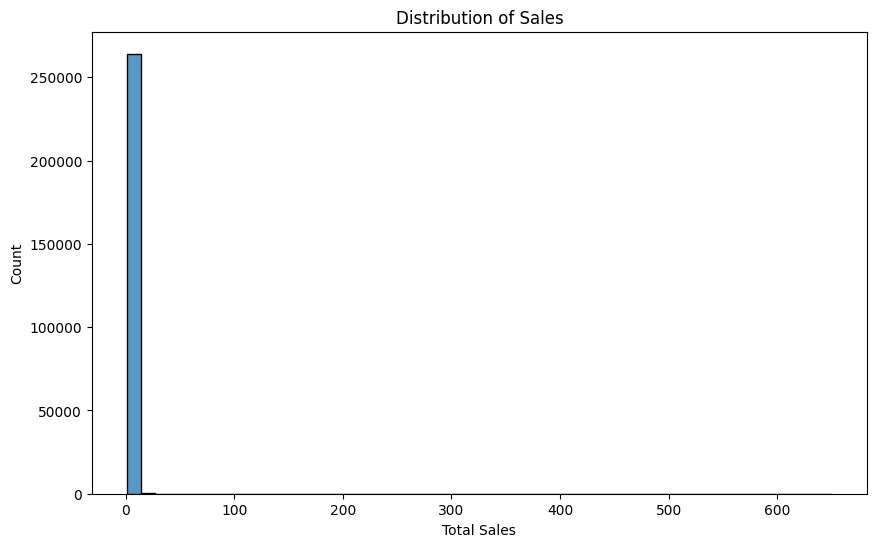

In [ ]:
# Distribution of Sales
plt.figure(figsize=(10, 6))
sns.histplot(data=transaction_df, x='TOT_SALES', bins=50)
plt.title('Distribution of Sales')
plt.xlabel('Total Sales')
plt.ylabel('Count')
plt.show()

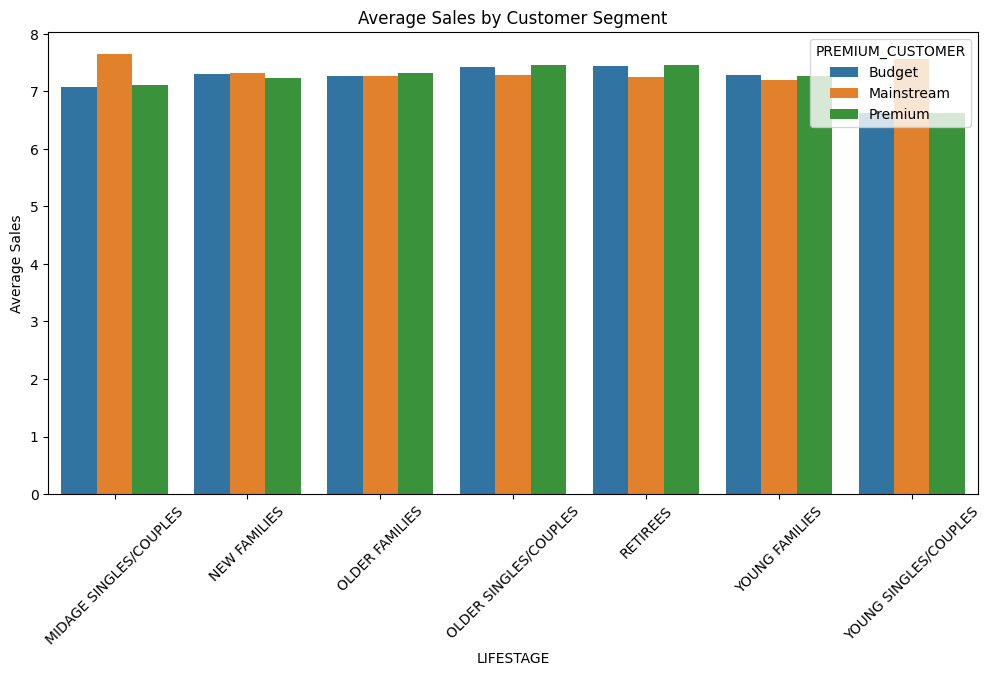

In [ ]:
# Sales by Customer Segments
segment_sales = pd.merge(transaction_df, behavior_df, on='LYLTY_CARD_NBR')
segment_analysis = segment_sales.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].agg([
    'mean', 'count', 'sum'
]).reset_index()

# Visualize Average Sales by Segment
plt.figure(figsize=(12, 6))
sns.barplot(data=segment_analysis, x='LIFESTAGE', y='mean', hue='PREMIUM_CUSTOMER')
plt.title('Average Sales by Customer Segment')
plt.xticks(rotation=45)
plt.ylabel('Average Sales')
plt.show()


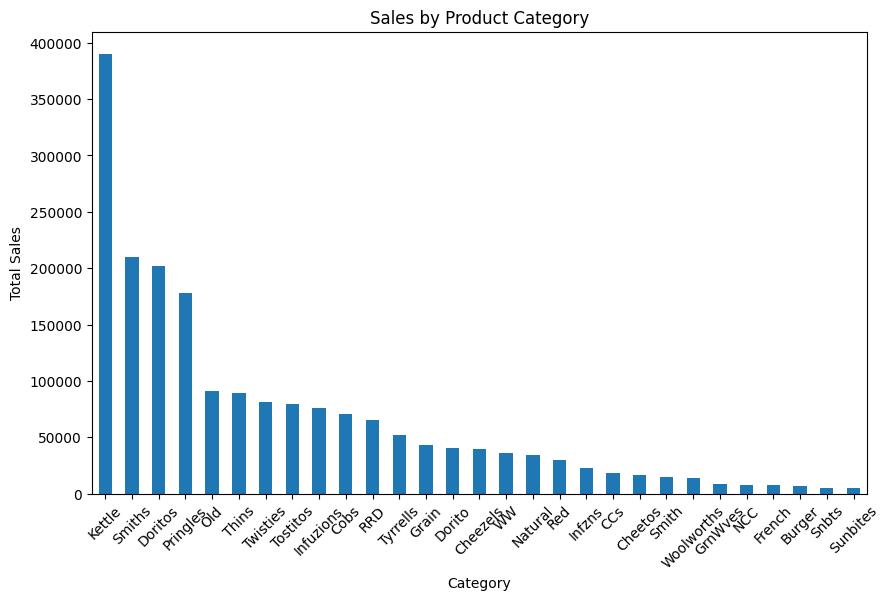

In [ ]:
# Product Category Analysis
transaction_df['Product_Category'] = transaction_df['PROD_NAME'].str.extract('(\\w+)\\s')
category_sales = transaction_df.groupby('Product_Category')['TOT_SALES'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar')
plt.title('Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

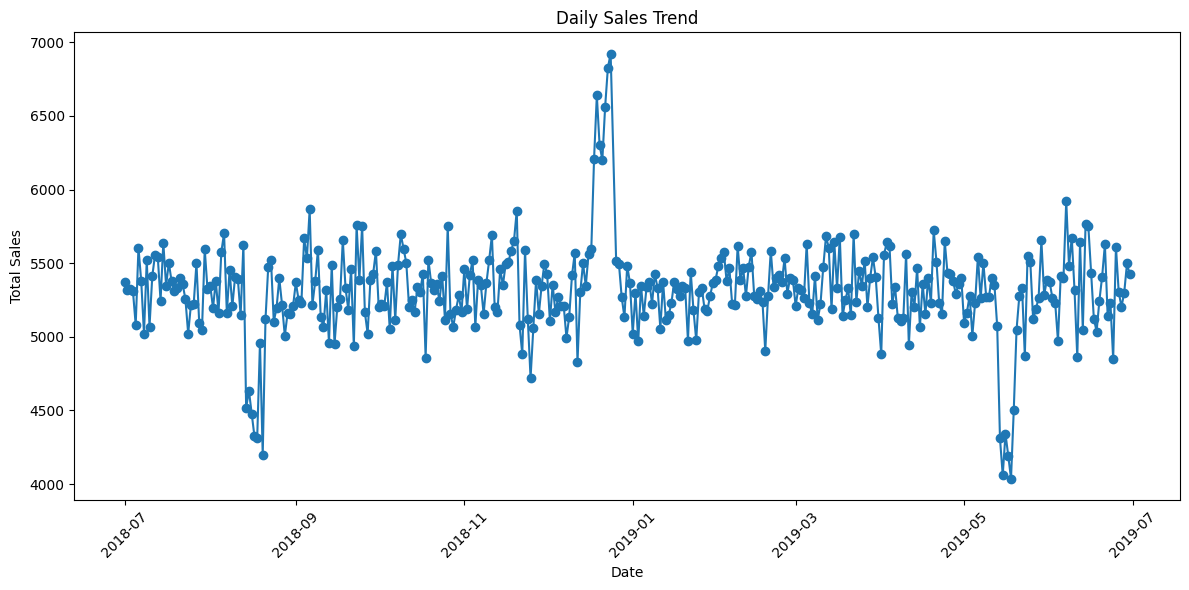

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert DATE column to datetime
transaction_df['DATE'] = pd.to_datetime(transaction_df['DATE'], origin='1899-12-30', unit='D')

# Group by date and sum total sales
daily_sales = transaction_df.groupby('DATE')['TOT_SALES'].sum().reset_index()

# Plot daily sales trend
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['DATE'], daily_sales['TOT_SALES'], marker='o')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


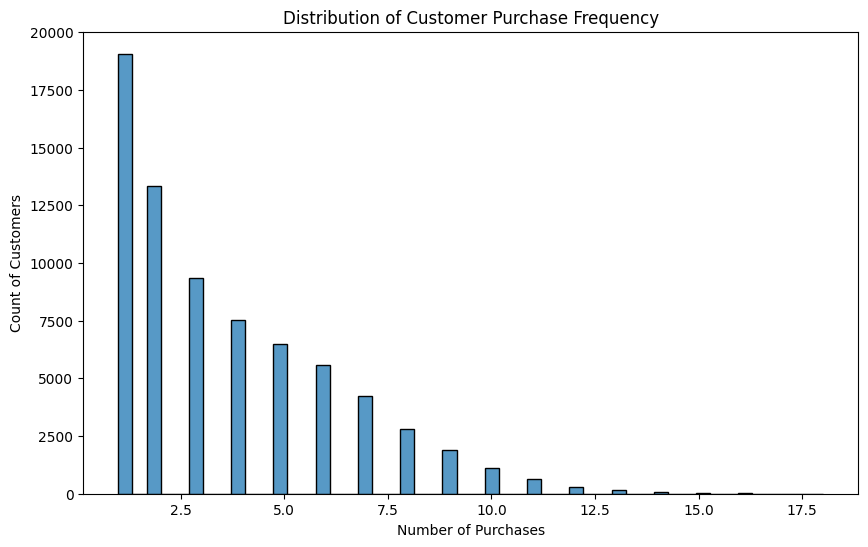

In [ ]:
# Customer Purchase Frequency Analysis
purchase_frequency = transaction_df.groupby('LYLTY_CARD_NBR').size().reset_index(name='purchase_count')
plt.figure(figsize=(10, 6))
sns.histplot(data=purchase_frequency, x='purchase_count', bins=50)
plt.title('Distribution of Customer Purchase Frequency')
plt.xlabel('Number of Purchases')
plt.ylabel('Count of Customers')
plt.show()

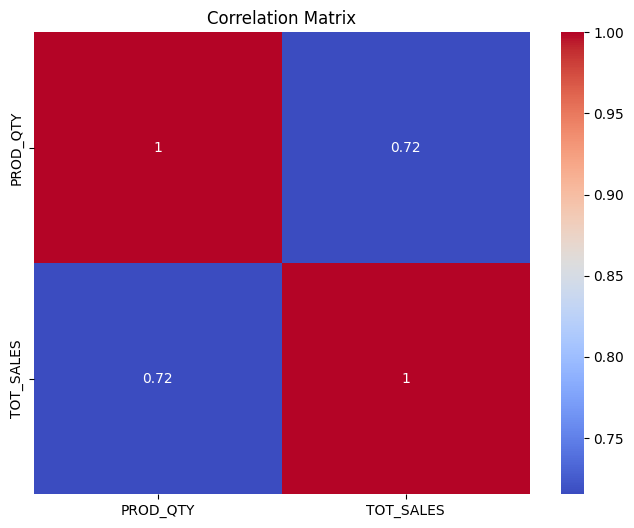

In [ ]:
# Correlation Analysis for Numerical Variables
correlation_matrix = transaction_df[['PROD_QTY', 'TOT_SALES']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()